<a href="https://colab.research.google.com/github/thaohung13/Homework-fuzzy-logic/blob/main/EX3_Mobile_Robot_with_fuzzy_logic(AXES_3D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import numpy as np
import skfuzzy as fuzz
import matplotlib
import matplotlib.pyplot as plt

from skfuzzy import control as ctrl
from matplotlib.legend import time
from skfuzzy.control.controlsystem import ControlSystemSimulation
from mpl_toolkits.mplot3d import Axes3D  

3.713675213675214


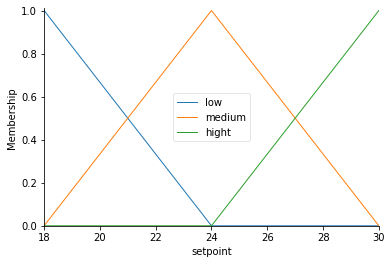

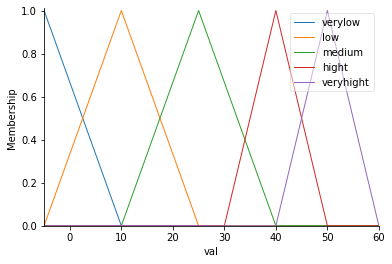

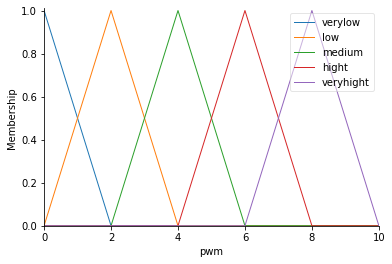

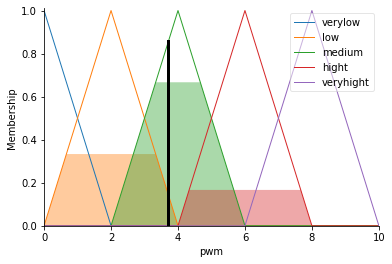

In [12]:
# Input & Output 
setpoint=ctrl.Antecedent(np.arange(18,31,1),'setpoint')
val=ctrl.Antecedent(np.arange(-5,61,1),'val')
#Initialize Antecedent and Consequent
pwm=ctrl.Consequent(np.arange(0,11,1),'pwm')

# Set membership functions
setpoint['low']=fuzz.trimf(setpoint.universe,[18,18,24])
setpoint['medium']=fuzz.trimf(setpoint.universe,[18,24,30])
setpoint['hight']=fuzz.trimf(setpoint.universe,[24,30,30])

val['verylow']=fuzz.trimf(val.universe,[-5,-5,10])
val['low']=fuzz.trimf(val.universe,[-5,10,25])
val['medium']=fuzz.trimf(val.universe,[10,25,40])
val['hight']=fuzz.trimf(val.universe,[30,40,50])
val['veryhight']=fuzz.trimf(val.universe,[40,50,60])

pwm['verylow']=fuzz.trimf(pwm.universe,[0,0,2])
pwm['low']=fuzz.trimf(pwm.universe,[0,2,4])
pwm['medium']=fuzz.trimf(pwm.universe,[2,4,6])
pwm['hight']=fuzz.trimf(pwm.universe,[4,6,8])
pwm['veryhight']=fuzz.trimf(pwm.universe,[6,8,10])

#Rule        
rule1=ctrl.Rule(setpoint['low']&val['verylow'],pwm['verylow'])
rule2=ctrl.Rule(setpoint['low']&val['low'],pwm['verylow'])
rule3=ctrl.Rule(setpoint['low']&val['medium'],pwm['verylow'])
rule4=ctrl.Rule(setpoint['low']&val['hight'],pwm['low'])
rule5=ctrl.Rule(setpoint['low']&val['veryhight'],pwm['hight'])
rule6=ctrl.Rule(setpoint['medium']&val['verylow'],pwm['low'])
rule7=ctrl.Rule(setpoint['medium']&val['low'],pwm['low'])
rule8=ctrl.Rule(setpoint['medium']&val['medium'],pwm['medium'])
rule9=ctrl.Rule(setpoint['medium']&val['hight'],pwm['medium'])
rule10=ctrl.Rule(setpoint['medium']&val['veryhight'],pwm['veryhight'])
rule11=ctrl.Rule(setpoint['hight']&val['verylow'],pwm['low'])
rule12=ctrl.Rule(setpoint['hight']&val['low'],pwm['medium'])
rule13=ctrl.Rule(setpoint['hight']&val['medium'],pwm['hight'])
rule14=ctrl.Rule(setpoint['hight']&val['hight'],pwm['hight'])
rule15=ctrl.Rule(setpoint['hight']&val['veryhight'],pwm['veryhight'])

#Display membership functions
setpoint.view()
val.view()
pwm.view()


pwming_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwming=ctrl.ControlSystemSimulation(pwming_ctrl)
pwming.input['setpoint']=25
pwming.input['val']=20
pwming.compute()
print(pwming.output['pwm'])
pwm.view(sim=pwming)



Recommended PWM intake: 0.67


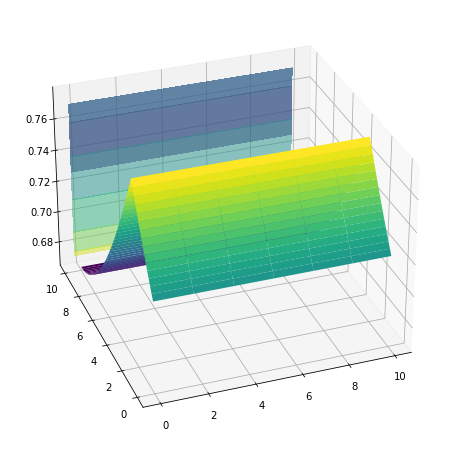

In [14]:
#Rules
rules = [
        ctrl.Rule(antecedent = ((setpoint['low']&val['verylow'])|
                                (setpoint['low']&val['low'])    |
                                (setpoint['low']&val['medium'])),
                                consequent = pwm['verylow']),
        
        ctrl.Rule(antecedent = ((setpoint['low']&val['hight'])      |
                               (setpoint['medium']&val['verylow'])  |
                               (setpoint['medium']&val['low'])      |
                               (setpoint['hight']&val['verylow'])   |
                                setpoint['hight']&val['verylow']),
                               consequent = pwm['low']),
        
        ctrl.Rule(antecedent = ((setpoint['medium']&val['medium'])   |
                                (setpoint['medium']&val['hight'])    |
                                (setpoint['hight']&val['low'])),
                                consequent = pwm['medium']),
                                
        ctrl.Rule(antecedent = ((setpoint['low']&val['veryhight'])   |
                                (setpoint['hight']&val['medium'])    |
                                (setpoint['hight']&val['hight'])),
                                consequent = pwm['hight']),       

        ctrl.Rule(antecedent = ((setpoint['medium']&val['veryhight'])   |
                                (setpoint['hight']&val['veryhight'])),
                                consequent = pwm['veryhight'])]     

# Create control system and simulate
system = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(system, flush_after_run=61 * 61 + 1)

upsampled = np.linspace(0, 10, 61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(61):
    for j in range(61):
        # Assign input values to antecedents
        sim.input['setpoint'] = x[i, j]
        sim.input['val'] = y[i, j]
        # Make sure all antecedents have input values before computing        
        sim.compute()
        z[i, j] = sim.output['pwm']

print("Recommended PWM intake:", round(sim.output['pwm'], 2))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

sutf = ax.plot_surface(x, y, z, rstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=9, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=11, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=11, cmap='viridis', alpha=0.5)

ax.view_init(30, 250) 